In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

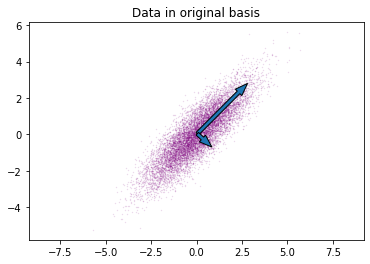

In [39]:
mean = np.array((0, 0))
cov = np.array(((2, 1.7), (1.7, 2)))

np.random.seed(666)
data = np.random.multivariate_normal(mean, cov, 10000)

#plt.grid()
#plt.rc('axes', axisbelow=True)
plt.scatter(data[:,0], data[:,1], s=0.1, alpha=0.2, color="purple")

pca = PCA(n_components=2)
pca.fit(data)

for length, w in zip(pca.explained_variance_, pca.components_):
    
    v = w * np.sqrt(length) * 2
    
    v = v
    
    plt.arrow(*(pca.mean_), *(pca.mean_ + v), width=0.2, length_includes_head=True,
              head_width=0.5, head_length=0.7)

plt.axis('equal')
plt.title("Data in original basis")
plt.show()
plt.close()

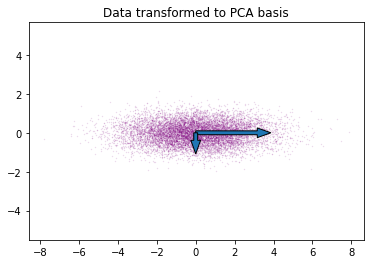

In [38]:
data_pca = pca.transform(data)

plt.scatter(data_pca[:, 0], data_pca[:, 1], s=0.1, alpha=0.2, color="purple")
#plt.scatter(data_pca[:, 0], np.zeros_like(data_pca[:, 1]), s=0.1, alpha=0.4)
pc1_length = pca.explained_variance_[0]
pc2_length = pca.explained_variance_[1]
plt.arrow(0, 0, np.sqrt(pc1_length)*2, 0, length_includes_head=True, width=0.2, head_width=0.5, head_length=0.7)
plt.arrow(0, 0, 0, -np.sqrt(pc2_length)*2, length_includes_head=True, width=0.2, head_width=0.5, head_length=0.7)

plt.axis('equal')
plt.title("Data transformed to PCA basis")
plt.show()
plt.close()

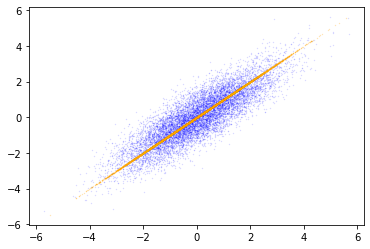

In [6]:
pca = PCA(n_components=1)
pca.fit(data)
data_pca = pca.transform(data)
data_new = pca.inverse_transform(data_pca)

plt.scatter(data[:,0], data[:,1], s=0.1, alpha=0.2, color="blue")
plt.scatter(data_new[:,0], data_new[:,1], s=0.1, alpha=0.4, color="orange")

In [7]:
w1 = pca.components_[0]
projections = np.array([x @ w1 for x in data])

print(projections)
print(data_pca[:, 0])
print(np.mean(projections - data_new[:, 0]))

plt.scatter(data_pca[:, 0], data_pca[:, 1], s=0.1, alpha=0.2, color="blue")
plt.scatter(projections, np.zeros_like(projections), s=0.1, alpha=0.4, color="orange")

#plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.show()
plt.close()

[-1.58508992 -2.25670451  1.09966676 ... -0.75248484  0.61639386
 -1.59948311]
[-1.63531603 -2.30693062  1.04944065 ... -0.80271095  0.56616775
 -1.64970923]
(10000,)
(10000, 1)
0.013404041222728164


IndexError: index 1 is out of bounds for axis 1 with size 1

In [30]:
from matplotlib.cm import get_cmap

cmap = get_cmap("twilight")
cmap(0.5)

(0.18488035509396164, 0.07942573027972388, 0.21307651648984993, 1.0)

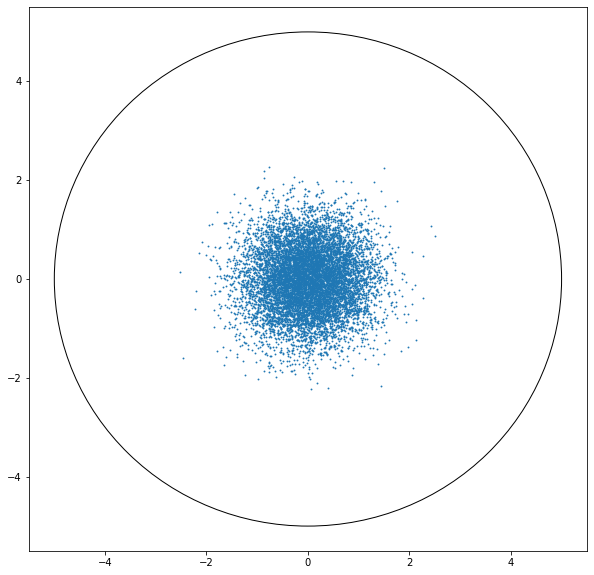

In [31]:
from matplotlib.patches import Circle

points = np.random.multivariate_normal((0,0), np.identity(2)*0.4, 10000)

fig, ax = plt.subplots()

fig.set_size_inches(10, 10)
plt.scatter(points[:, 0], points[:, 1], s=0.75)

circle = plt.Circle((0,0), 5, fill=False)
ax.add_patch(circle)

plt.show()

plt.close()